<a href="https://colab.research.google.com/github/LeoSotoG/Scaling-types/blob/main/StandarScaler%2C_MinMaxScaler%2C_RobustScaler%2C_Normalizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**StandarScaler, MinMaxScaler, Robust Scaler y Normalizer**

##Teoria:
Los escaladores (scalers) se utilizan en el preprocesamiento de datos en aprendizaje automático para transformar características (variables) de un conjunto de datos en una escala específica. Algunas de las razones y usos principales de los escaladores son:

* **Normalización de características**: Los escaladores se utilizan para llevar las características a una escala común, lo que puede ser útil para algoritmos que son sensibles a la escala de las características, como SVM, KNN y redes neuronales.

* **Mejora de la convergencia**: Algunos algoritmos de aprendizaje automático convergen más rápido cuando las características están en la misma escala. La normalización puede ayudar a mejorar la velocidad de convergencia.

* **Reducción del impacto de los valores atípicos**: Algunos escaladores, como RobustScaler, son robustos frente a valores atípicos y pueden reducir su impacto en el modelo.

* **Interpretación visual**: La normalización puede facilitar la interpretación visual de los datos, especialmente en gráficos de dispersión o de densidad, al igualar la escala de las características.

* **Regularización**: Algunas técnicas de regularización, como la regresión Ridge o LASSO, penalizan los coeficientes de las características según su magnitud. Escalar las características puede ayudar a garantizar que todas contribuyan de manera equitativa al modelo.

En resumen, los escaladores son una parte importante del preprocesamiento de datos en aprendizaje automático, ya que ayudan a mejorar la eficacia y el rendimiento de los modelos al ajustar y normalizar las características en una escala adecuada.

##Lectura de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

##Lectura de datos

In [ ]:
data = pd.read_csv("datos_personas.csv")
data

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ingreso  1000 non-null   float64
 1   carros   1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


Se puede observar que en este set de datos solo contienen dos variables y ambas son numericas

##Graficando los datos en escala original

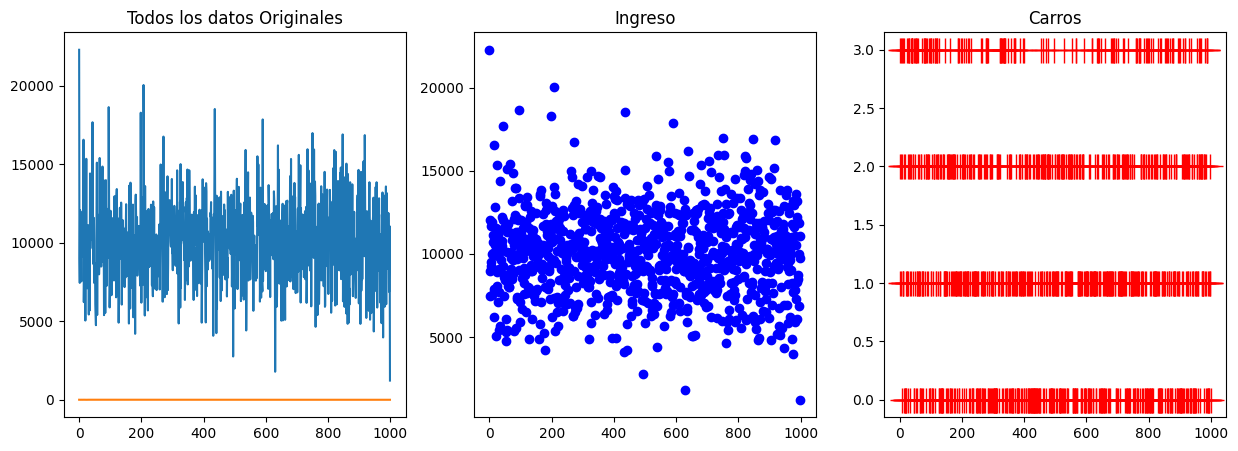

In [ ]:
# Creamos una figura
fig = plt.figure(figsize=(15,5))
# Definimos subfiguras dentro de la figura
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# Agregamos los titulos a cada subfigura y los valores que se van a graficar
ax1.set_title("Todos los datos Originales")
ax1.plot(data)

ax2.set_title("Ingreso")
ax2.plot(data["ingreso"], linewidth=0, marker = "o", color = "blue", markersize=6)

ax3.set_title("Carros")
ax3.plot(data["carros"], linewidth=0, marker = "+", color = "red", markersize=18)

# Mostramos la figura
plt.show()

Se puede observar que la escala en el eje y en ambas variables cambia demasiado y cuando se grafican juntas son dificiles de entender

##Distribucion de los datos originales

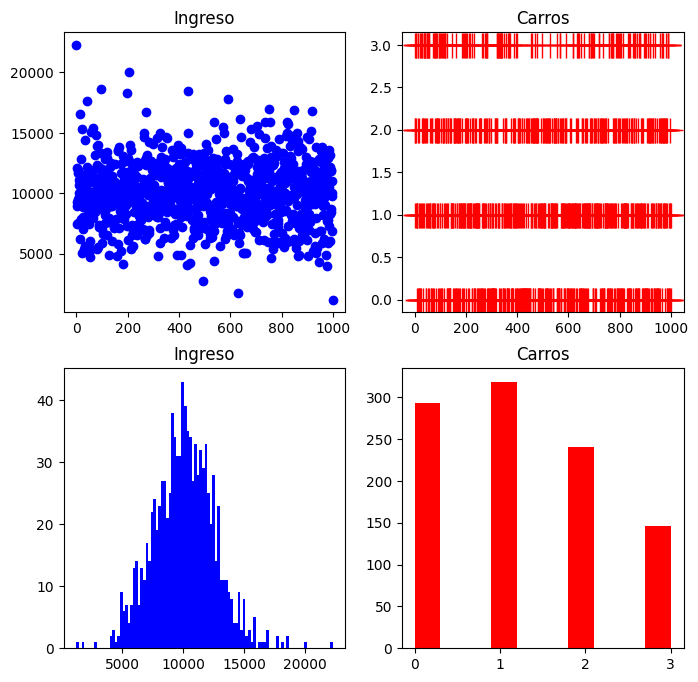

In [ ]:
# Creamos una figura
fig = plt.figure(figsize=(8,8))
# Definimos 4 subfiguras dentro de la figura
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Agregamos los titulos a cada grafico y los valores que se van a graficar
ax1.set_title("Ingreso")
ax1.plot(data["ingreso"], linewidth=0, marker = "o", color = "blue", markersize=6)

ax2.set_title("Carros")
ax2.plot(data["carros"], linewidth=0, marker = "+", color = "red", markersize=18)

ax3.set_title("Ingreso")
ax3.hist(data["ingreso"], bins=100, color="blue")

ax4.set_title("Carros")
ax4.hist(data["carros"], color = "red")

plt.show()

Observaciones:
* Se puede observar que en ingreso los datos se estan distribuyendo con un promedio de 10000 y existen muy pocas personas que ganan muy poco o mucho.

* En el caso de la variables carros se puede observar que la mayoria tiene entre 0 o 1 carro

**Objetivo**
Lo que se busca es lograr que las variables tengan el mismo peso dentro de un modelo

##MinMaxScaler
Es una herramienta que transforma características para que estén en un rango específico, comúnmente entre 0 y 1, lo que ayuda a mejorar el rendimiento de los modelos de aprendizaje automático al igualar las escalas de las características.

In [ ]:
# Creando una instancia de MinMaxScaler
scaler_MinMax = preprocessing.MinMaxScaler()
scaler_MinMax

MinMaxScaler()

In [ ]:
#Aplicando la transformacion MinMaxScaler a el conjunto de datos
datos_MinMax = scaler_MinMax.fit_transform(data)
# Cambiando a DataFrame debido a que se obtiene un vector
d_MinMax = pd.DataFrame(datos_MinMax, columns = ["ingreso", "carros"])

##Normalizer
Normaliza cada muestra individualmente para que tenga una norma específica, por lo general una longitud de 1, utilizando la norma del vector. Esto significa que ajusta cada muestra para que tenga una longitud de 1 en el espacio vectorial en función de la norma L1 o L2 del vector, según se especifique. Esta técnica es útil en ciertos algoritmos o casos de uso donde es importante la relación entre las muestras más que entre las características individuales. La norma del vector proporciona una medida de la magnitud de un vector en el espacio, lo que permite normalizar las muestras de manera que tengan una magnitud uniforme, independientemente de la escala de las características individuales.

In [ ]:
# Creando una instancia de Normalizer
scaler_Normalizer = preprocessing.Normalizer()
scaler_Normalizer

Normalizer()

In [ ]:
#Aplicando la transformacion Normalizer a el conjunto de datos
datos_Normalizer = preprocessing.Normalizer().transform(data.T)
datos_Normalizer = datos_Normalizer.T
# Cambiando a DataFrame debido a que se obtiene un vector
d_Normalizer = pd.DataFrame(datos_Normalizer, columns = ["ingreso", "carros"])


##StandarScaler
Estandariza las características de manera que tengan una media de 0 y una desviación estándar de 1, lo que puede mejorar el rendimiento y la convergencia de los modelos de aprendizaje automático, especialmente aquellos que son sensibles a la escala de las características.

In [ ]:
# Creando una instancia de StandarScaler
scaler_Standar = preprocessing.StandardScaler()
scaler_Standar

StandardScaler()

In [ ]:
# Aplicando la transformacion StandarScaler a el conjunto de datos
datos_Standar = scaler_Standar.fit_transform(data)
# Cambiando a DataFrame debido a que se obtiene un vector
d_Standar = pd.DataFrame(datos_Standar, columns = ["ingreso", "carros"])

##RobustScaler
Es una herramienta de preprocesamiento que escala características utilizando estadísticas robustas frente a valores atípicos, como la mediana y el rango intercuartílico. Esto ayuda a mejorar el rendimiento de los modelos al reducir el impacto de los valores atípicos en los datos.

In [ ]:
# Creando una instancia de RobustScaler
scaler_Robust = preprocessing.RobustScaler()
scaler_Robust

RobustScaler()

In [ ]:
# Aplicando la transformacion RobustScaler a el conjunto de datos
datos_Robust = scaler_Robust.fit_transform(data)
# Cambiando a DataFrame debido a que se obtiene un vector
d_Robust = pd.DataFrame(datos_Robust, columns = ["ingreso", "carros"])

##Columna "ingreso": Comparación de metodos

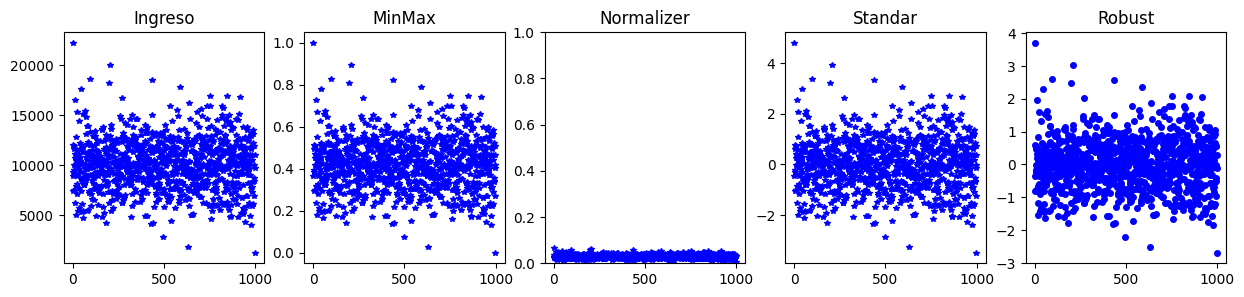

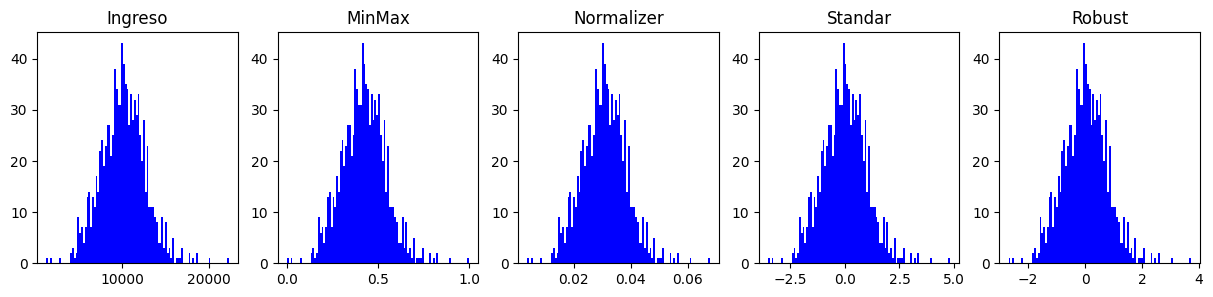

In [ ]:
# Creando una figura de 5 subgiguras para comparar los metodos
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Creando los titulos de las subfiguras y asignando su contenido para series de datos
ax1.set_title("Ingreso")
ax1.plot(data["ingreso"], linewidth=0, marker = "*", color = "blue", markersize=4)

ax2.set_title("MinMax")
ax2.plot(d_MinMax["ingreso"], linewidth=0, marker = "*", color = "blue", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(d_Normalizer["ingreso"], linewidth=0, marker = "*", color = "blue", markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title("Standar")
ax4.plot(d_Standar["ingreso"], linewidth=0, marker = "*", color = "blue", markersize=4)

ax5.set_title("Robust")
ax5.plot(d_Robust["ingreso"], linewidth=0, marker = "o", color = "blue", markersize=4)

plt.show()

# Creando una figura de 5 subgiguras para mostrar los histogramas
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Creando los titulos de las subfiguras y asignando su contenido para histogramas
ax1.set_title("Ingreso")
ax1.hist(data["ingreso"], bins=100, color = "blue")

ax2.set_title("MinMax")
ax2.hist(d_MinMax["ingreso"], bins=100, color = "blue")

ax3.set_title("Normalizer")
ax3.hist(d_Normalizer["ingreso"], bins=100, color = "blue")

ax4.set_title("Standar")
ax4.hist(d_Standar["ingreso"], bins=100, color = "blue")

ax5.set_title("Robust")
ax5.hist(d_Robust["ingreso"], bins=100, color = "blue")

plt.show()

**Observaciones**
* Se puede observar que cambiaron las escalas pero la información no se vio afectada.
* Normalizer esta apachurrando los datos, por lo tanto no es tan utilizado.
* En Standar y Robust pareciera que tuvieran la misma escala pero en el robust tiene valores mas pequeños debido a que usa el rango intercuartil y puede ayudar con los outlyers.

##Columna "carros": Comparación de metodos

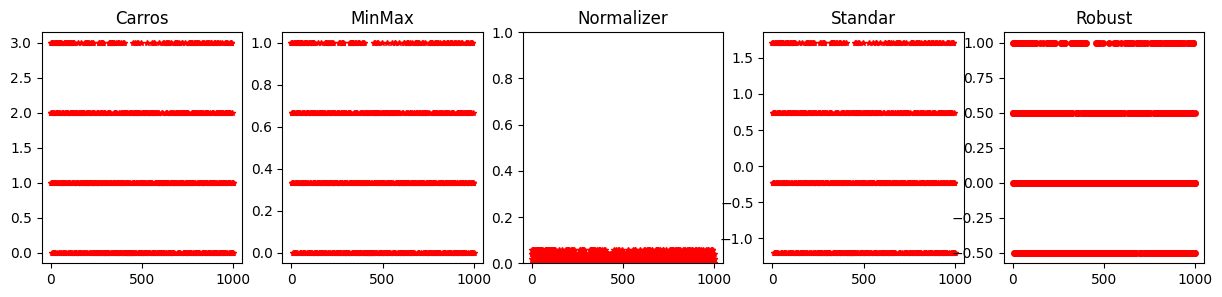

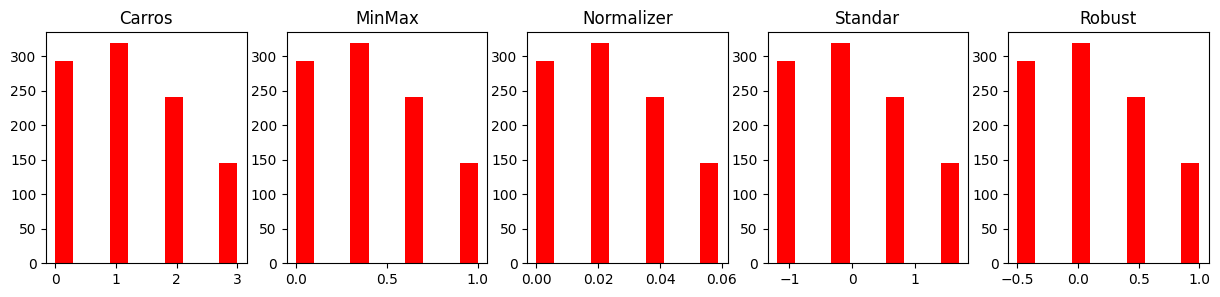

In [ ]:
# Creando una figura de 5 subgiguras para comparar los metodos
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Creando los titulos de las subfiguras y asignando su contenido para series de datos
ax1.set_title("Carros")
ax1.plot(data["carros"], linewidth=0, marker = "*", color = "red", markersize=4)

ax2.set_title("MinMax")
ax2.plot(d_MinMax["carros"], linewidth=0, marker = "*", color = "red", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(d_Normalizer["carros"], linewidth=0, marker = "*", color = "red", markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title("Standar")
ax4.plot(d_Standar["carros"], linewidth=0, marker = "*", color = "red", markersize=4)

ax5.set_title("Robust")
ax5.plot(d_Robust["carros"], linewidth=0, marker = "o", color = "red", markersize=4)

plt.show()

# Creando una figura de 5 subgiguras para mostrar los histogramas
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Creando los titulos de las subfiguras y asignando su contenido para histogramas
ax1.set_title("Carros")
ax1.hist(data["carros"], color = "red")

ax2.set_title("MinMax")
ax2.hist(d_MinMax["carros"], color = "red")

ax3.set_title("Normalizer")
ax3.hist(d_Normalizer["carros"], color = "red")

ax4.set_title("Standar")
ax4.hist(d_Standar["carros"], color = "red")

ax5.set_title("Robust")
ax5.hist(d_Robust["carros"], color = "red")

plt.show()

**Observaciones**
* Se muestra muy semejante a la variable ingreso pero gracias a esto se esta eliminando el peso que pudo tener la variable ingreso con respecto al número de carros y ambos estarian en el mismo rango